In [1]:
# Import required libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC  # For classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fftpack import fft2, ifft2
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Set the path for the dataset (GALLERY)
GALLERY = os.path.join(os.getcwd(), 'att_faces')

# Initialize lists to hold images and labels
images = []
labels = []

In [3]:
# Load images and labels from GALLERY
for folder in os.listdir(GALLERY):
    folder_path = os.path.join(GALLERY, folder)  # Path to the individual folder
    if os.path.isdir(folder_path):  # Check if it's a valid directory
        for img_filename in os.listdir(folder_path):  # Iterate over image files
            img_path = os.path.join(folder_path, img_filename)  # Full path to image
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            labels.append(int(folder.split("s")[1]))  # Extract label from folder name
            images.append(np.array(img))  # Store image as a NumPy array

# Convert lists to NumPy arrays
images = np.array(images)  # Shape: (num_images, height, width)
labels = np.array(labels)  # Shape: (num_images,)

In [26]:
# Flatten images for PCA (convert 2D images to 1D vectors)
num_images, height, width = images.shape
print(images.shape)
images_flattened = images.reshape(num_images, height * width)  # Shape

(400, 112, 92)


In [27]:
# Check flattened shape
print(f"Shape of flattened images: {images_flattened.shape}")

Shape of flattened images: (400, 10304)


In [5]:
# FFT (Fast Fourier Transform) - Apply FFT to each image
images_fft = np.zeros_like(images_flattened)
for i in range(num_images):
    img = images[i]
    fft_result = fft2(img)
    images_fft[i] = np.abs(fft_result).flatten()  # Store the magnitude of FFT for feature extraction

In [28]:
# Check FFT shape
print(f"Shape of FFT transformed images: {images_fft.shape}")

Shape of FFT transformed images: (400, 10304)


In [29]:
#Normalize the pixel values to the range [0, 1]
images_normalized = images_flattened / 255.0  # Normalize by dividing by 255 (max pixel value)

# Check normalization
print(f"Min value in normalized images: {images_normalized.min()}")
print(f"Max value in normalized images: {images_normalized.max()}")

Min value in normalized images: 0.0
Max value in normalized images: 0.984313725490196


In [31]:
# Normalize the data by subtracting the mean (mean-centering)
images_mean = np.mean(images_flattened, axis=0)  # Compute mean of all images
images_mean_centered = images_flattened - images_mean  # Subtract the mean

In [32]:
# Check mean centering
print(f"Mean of the first image (after centering): {np.mean(images_mean_centered[0])}")

Mean of the first image (after centering): 15.706933229813664


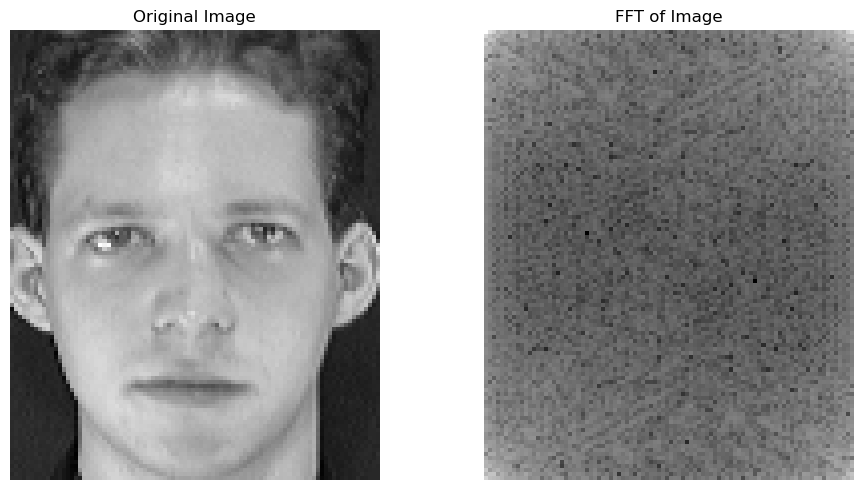

In [33]:
# Optional: Show some sample images before and after FFT
plt.figure(figsize=(10, 5))

# Show a sample original image
plt.subplot(1, 2, 1)
plt.imshow(images[0], cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Show the magnitude of FFT of the same image
fft_image = np.abs(fft2(images[0]))
plt.subplot(1, 2, 2)
plt.imshow(np.log(fft_image + 1), cmap='gray')  # Apply log scale to visualize FFT magnitude
plt.title("FFT of Image")
plt.axis('off')

plt.tight_layout()
plt.show()

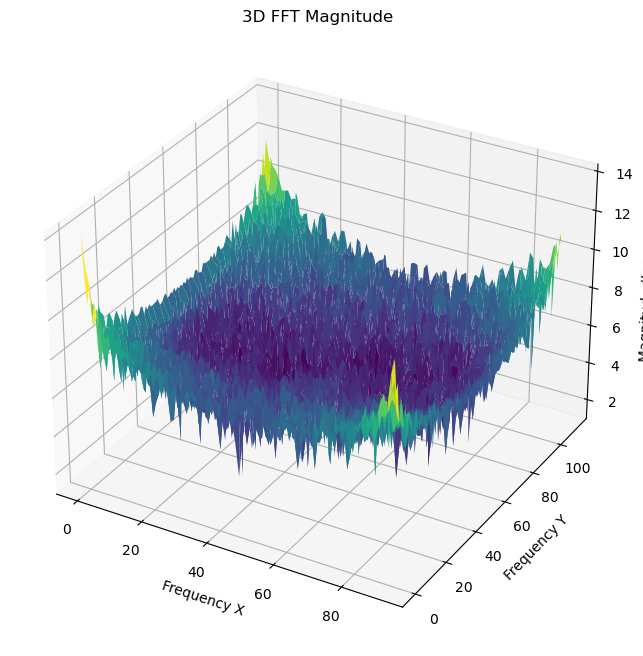

In [35]:
# Function to plot FFT in 3D
def plot_fft_3d(image):
    # Apply 2D FFT to the image
    fft_result = fft2(image)
    
    # Compute the magnitude of the FFT
    fft_magnitude = np.abs(fft_result)
    
    # Create grid of coordinates (X, Y) to correspond to each frequency component
    rows, cols = fft_magnitude.shape
    x = np.arange(0, cols)
    y = np.arange(0, rows)
    X, Y = np.meshgrid(x, y)  # Create meshgrid for the frequency components
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the magnitude in 3D
    ax.plot_surface(X, Y, np.log(fft_magnitude + 1), cmap='viridis', edgecolor='none')  # Use log scale for better visibility
    
    # Set labels and title
    ax.set_xlabel('Frequency X')
    ax.set_ylabel('Frequency Y')
    ax.set_zlabel('Magnitude (log scale)')
    ax.set_title('3D FFT Magnitude')
    
    # Show the plot
    plt.show()

# Example usage: plot 3D FFT for the first image
plot_fft_3d(images[0])  # Call this function for any image


In [7]:
# Compute the covariance matrix
covariance_matrix = np.cov(images_normalized, rowvar=False)

In [8]:
# Singular Value Decomposition (SVD) for Eigenfaces
U, S, Vt = np.linalg.svd(covariance_matrix)
eigenfaces = Vt.T  # Eigenfaces are the eigenvectors of the covariance matrix

In [9]:
# Apply PCA to find principal components
pca = PCA()
pca.fit(images_normalized)

PCA()

In [10]:
# Explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [11]:
# After fitting PCA on the data
explained_variance_ratio = pca.explained_variance_ratio_  # Percentage of variance explained by each component
cumulative_variance = np.cumsum(explained_variance_ratio)  # Cumulative variance

# Print the explained variance for each principal component
for i, var in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: Explained Variance = {var:.4f}")

# Print the cumulative explained variance (how much total variance is explained by the first n components)
for i, cum_var in enumerate(cumulative_variance):
    print(f"Cumulative variance after {i+1} components: {cum_var:.4f}")

Component 1: Explained Variance = 0.1761
Component 2: Explained Variance = 0.1291
Component 3: Explained Variance = 0.0684
Component 4: Explained Variance = 0.0558
Component 5: Explained Variance = 0.0511
Component 6: Explained Variance = 0.0336
Component 7: Explained Variance = 0.0245
Component 8: Explained Variance = 0.0233
Component 9: Explained Variance = 0.0196
Component 10: Explained Variance = 0.0180
Component 11: Explained Variance = 0.0144
Component 12: Explained Variance = 0.0140
Component 13: Explained Variance = 0.0112
Component 14: Explained Variance = 0.0107
Component 15: Explained Variance = 0.0097
Component 16: Explained Variance = 0.0091
Component 17: Explained Variance = 0.0088
Component 18: Explained Variance = 0.0084
Component 19: Explained Variance = 0.0074
Component 20: Explained Variance = 0.0070
Component 21: Explained Variance = 0.0067
Component 22: Explained Variance = 0.0064
Component 23: Explained Variance = 0.0059
Component 24: Explained Variance = 0.0054
C

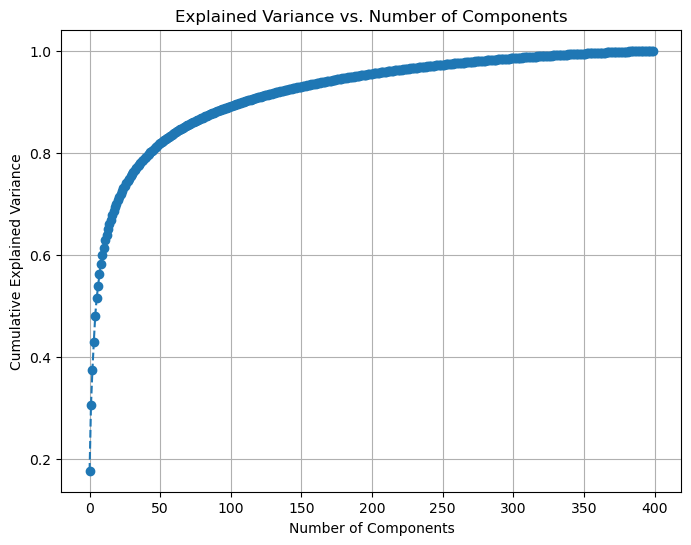

In [12]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [13]:
# Function to reconstruct faces with a specified number of components
def reconstruct_faces(n_components):
    """
    Reconstructs faces using a specified number of principal components.
    Args:
        n_components (int): Number of components to use for reconstruction.
    Returns:
        np.array: Reconstructed images.
    """
    pca_reduced = PCA(n_components=n_components)  # Fit PCA with reduced components
    reduced_data = pca_reduced.fit_transform(images_normalized)  # Project to lower dimension
    reconstructed = pca_reduced.inverse_transform(reduced_data)  # Project back to original space
    return reconstructed + images_mean  # Add the mean back to reconstruct images

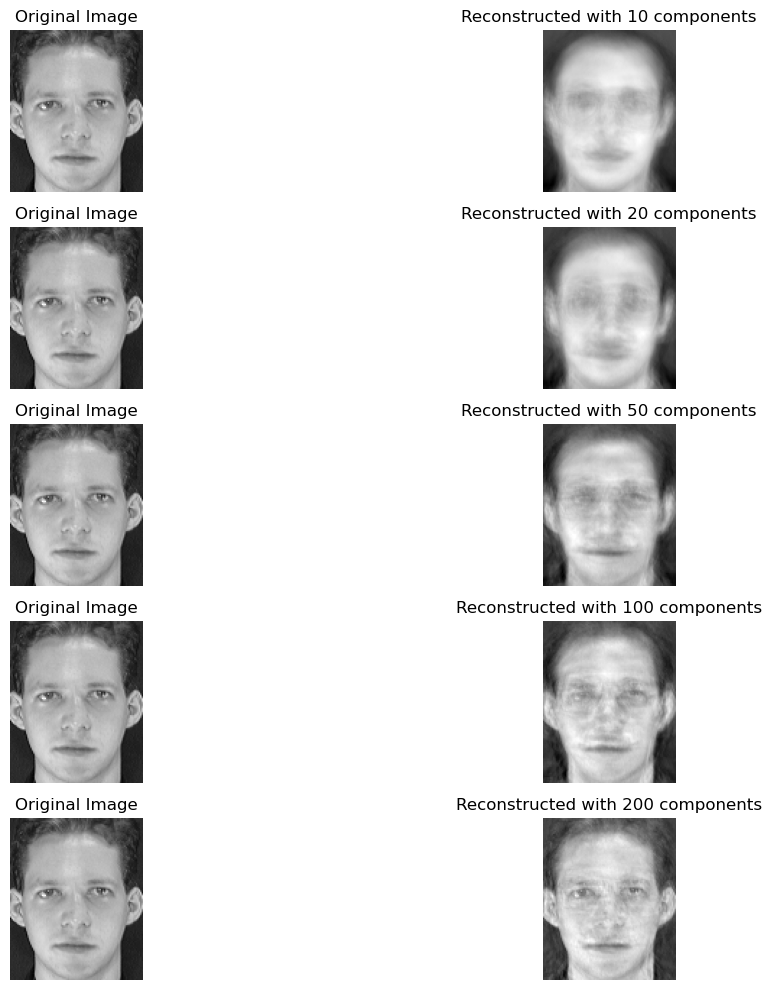

In [14]:
# Visualize original vs reconstructed images for various numbers of components
components_to_try = [10, 20, 50, 100, 200]
plt.figure(figsize=(15, len(components_to_try) * 2))
for i, n_components in enumerate(components_to_try):
    reconstructed_images = reconstruct_faces(n_components).reshape(num_images, height, width)
    
    # Original image (first image in the dataset)
    plt.subplot(len(components_to_try), 2, 2 * i + 1)
    plt.imshow(images[0], cmap='gray')  # Display the original image
    plt.title('Original Image')
    plt.axis('off')
    
    # Reconstructed image (first image)
    plt.subplot(len(components_to_try), 2, 2 * i + 2)
    plt.imshow(reconstructed_images[0], cmap='gray')  # Display reconstructed image
    plt.title(f'Reconstructed with {n_components} components')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)

In [16]:
# Train a classifier (Support Vector Machine)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
# Predict on test set
y_pred = svm.predict(X_test)

In [18]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 98.75%


In [19]:
def calculate_mse(original, reconstructed):
    return mean_squared_error(original.flatten(), reconstructed.flatten())

In [20]:
for n_components in components_to_try:
    reconstructed_images = reconstruct_faces(n_components).reshape(num_images, height, width)
    mse = calculate_mse(images[0], reconstructed_images[0])
    print(f"MSE for {n_components} components: {mse:.2f}")

MSE for 10 components: 515.68
MSE for 20 components: 432.17
MSE for 50 components: 266.44
MSE for 100 components: 181.58
MSE for 200 components: 82.52


In [21]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {optimal_components}")

Number of components to retain 95% variance: 190


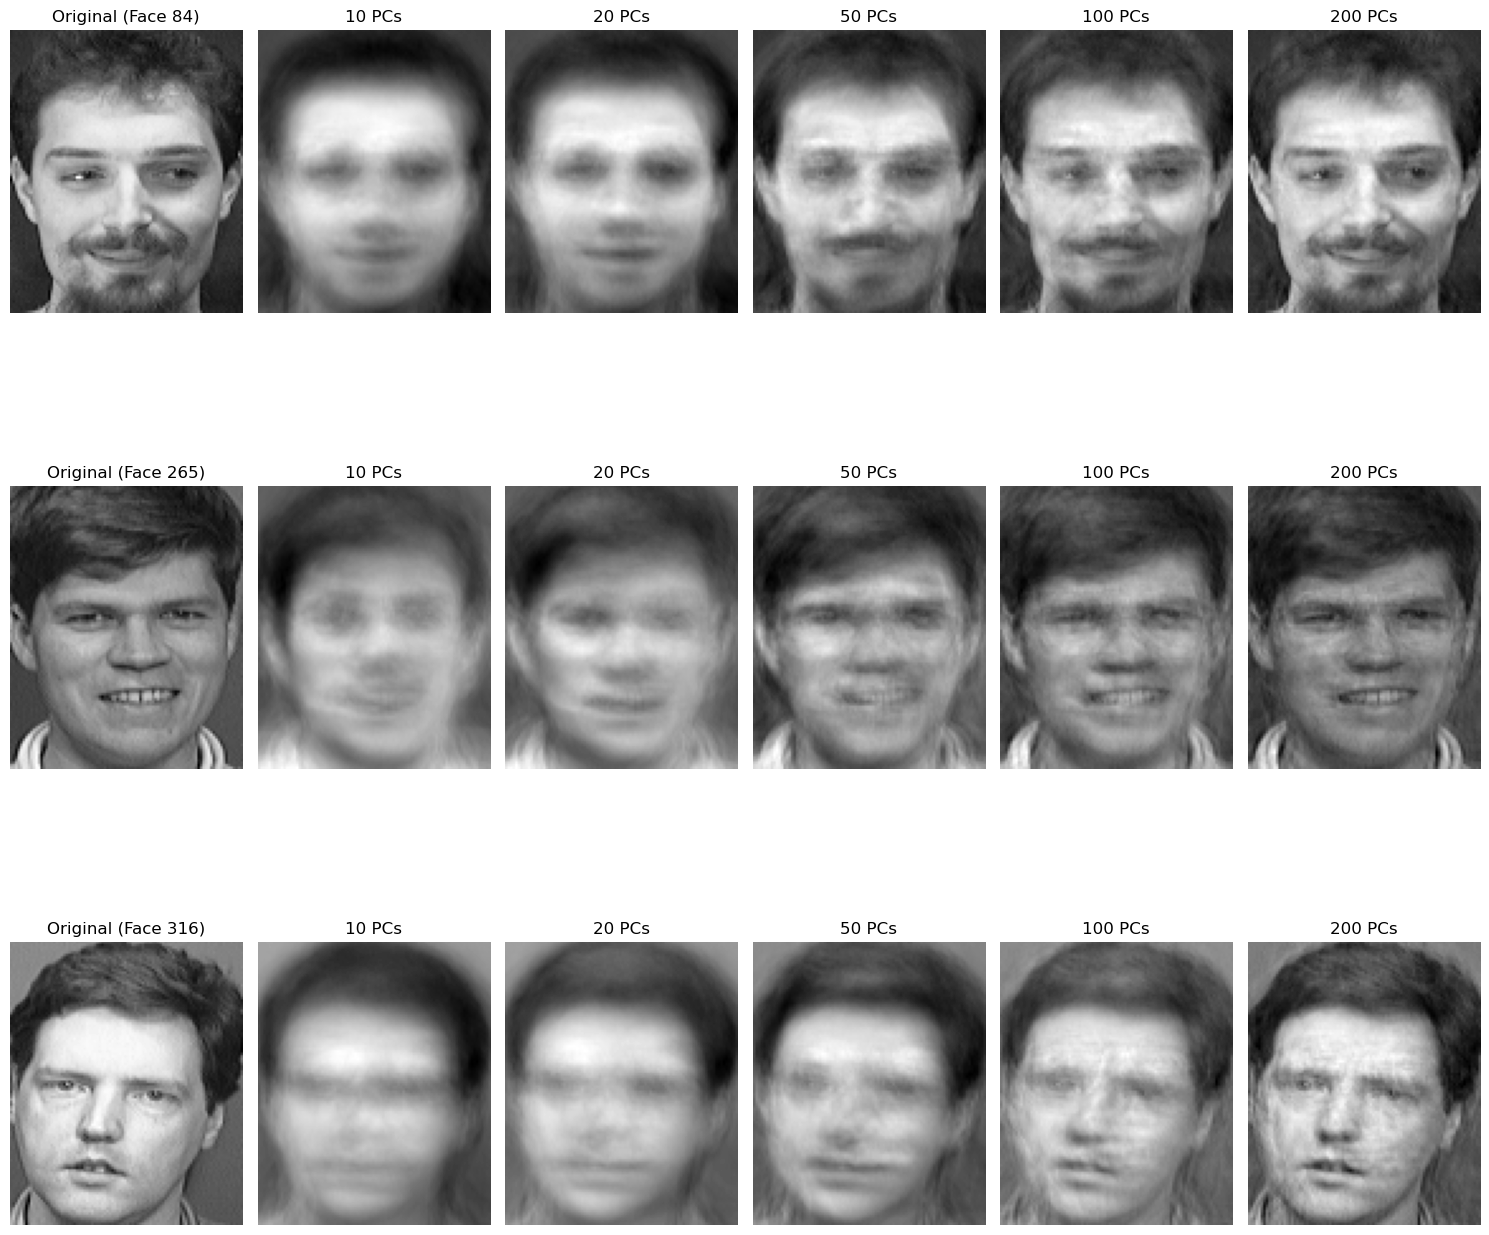

In [22]:
# Visualize original vs reconstructed images for various numbers of components in a vertical layout
components_to_try = [10, 20, 50, 100, 200]
num_faces_to_visualize = 3 # Number of random faces to visualize

# Randomly select indices for faces
random_indices = np.random.choice(num_images, num_faces_to_visualize, replace=False)

plt.figure(figsize=(15, num_faces_to_visualize * len(components_to_try)))

for j, face_index in enumerate(random_indices):  # Loop through random face indices
    # Original image
    plt.subplot(num_faces_to_visualize, len(components_to_try) + 1, j * (len(components_to_try) + 1) + 1)
    plt.imshow(images[face_index], cmap='gray')  # Display the original image
    plt.title(f'Original (Face {face_index})')
    plt.axis('off')
    
    # Reconstructed images for various components
    for i, n_components in enumerate(components_to_try):
        reconstructed_images = reconstruct_faces(n_components).reshape(num_images, height, width)
        plt.subplot(num_faces_to_visualize, len(components_to_try) + 1, j * (len(components_to_try) + 1) + i + 2)
        plt.imshow(reconstructed_images[face_index], cmap='gray')  # Display reconstructed image
        plt.title(f'{n_components} PCs')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
# Function to compute explained variance and print for selected components
def print_explained_variance(pca, components_list):
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    print("Explained Variance for Selected Components:")
    for n_components in components_list:
        if n_components <= len(cumulative_variance):
            print(f"  {n_components} components explain {cumulative_variance[n_components - 1]:.2%} of variance.")
        else:
            print(f"  {n_components} components exceed total components available.")

# Function to compute MSE for reconstructed images
def compute_mse(images, n_components_list):
    print("\nReconstruction Quality (MSE):")
    for n_components in n_components_list:
        reconstructed_images = reconstruct_faces(n_components).reshape(num_images, height, width)
        mse = mean_squared_error(images.flatten(), reconstructed_images.flatten())
        print(f"  MSE with {n_components} components: {mse:.4f}")

# Function to compute compression ratio
def compute_compression_ratio(n_components_list, total_features):
    print("\nCompression Ratio:")
    for n_components in n_components_list:
        compression_ratio = n_components / total_features
        print(f"  {n_components} components: Compression Ratio = {compression_ratio:.2%}")

# Evaluate compression
components_to_evaluate = [10, 50, 100, 200]  # Components to analyze
total_features = images_flattened.shape[1]  # Total features in original images (e.g., 4096 for 64x64)

# Print explained variance
print_explained_variance(pca, components_to_evaluate)

# Compute MSE
compute_mse(images, components_to_evaluate)

# Compute Compression Ratios
compute_compression_ratio(components_to_evaluate, total_features)


Explained Variance for Selected Components:
  10 components explain 59.95% of variance.
  50 components explain 81.61% of variance.
  100 components explain 89.06% of variance.
  200 components explain 95.46% of variance.

Reconstruction Quality (MSE):
  MSE with 10 components: 621.7159
  MSE with 50 components: 286.3000
  MSE with 100 components: 171.1865
  MSE with 200 components: 71.6686

Compression Ratio:
  10 components: Compression Ratio = 0.10%
  50 components: Compression Ratio = 0.49%
  100 components: Compression Ratio = 0.97%
  200 components: Compression Ratio = 1.94%
